# Assignment 3: Classification

*NOTE: This notebook is provided only as a template for you to use for the assignment. You may modify it as you see fit.*

In [2]:
# Import libraries.
import pandas as pd

# download data
data_url = 'https://raw.githubusercontent.com/cse44648/cse44648/master/datasets/hypothyroid.csv'
#Read from URL
data = pd.read_csv(data_url)

# Output the first few rows of the dataset.
data.head()



,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Thyroid Surgery,Query Hypothyroid,Query Hyperthyroid,Pregnant,Sick,...,T3,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,TBG Measured,TBG,Class
0,72.0,M,f,f,f,f,f,f,f,f,...,0.6,y,15.0,y,1.48,y,10.0,n,NaN,hypothyroid
1,15.0,F,t,f,f,f,f,f,f,f,...,1.7,y,19.0,y,1.13,y,17.0,n,NaN,hypothyroid
2,24.0,M,f,f,f,f,f,f,f,f,...,0.2,y,4.0,y,1.00,y,0.0,n,NaN,hypothyroid
3,24.0,F,f,f,f,f,f,f,f,f,...,0.4,y,6.0,y,1.04,y,6.0,n,NaN,hypothyroid
4,77.0,M,f,f,f,f,f,f,f,f,...,1.2,y,57.0,y,1.28,y,44.0,n,NaN,hypothyroid


## Question 1: 3-nearest neighbors (10 points)
Use k-nearest neighbor to classify the hypothyroid data. Set the number of neighbors, k, to 3. Split the data so that 80% is used for training and the remaining 20% for testing. The scikit-learn implementation of k-Nearest Neighbor is called KNeighborsClassifier (sklearn.neighbors.KNeighborsClassifier). You may also use the scikit-learn for splitting data into training and testing sets (sklearn.model_selection.train_test_split). Using two features of your choice, build the model on the training set and visualize the results on the testing set by plotting the decision boundaries. Any observations about the decision boundary?

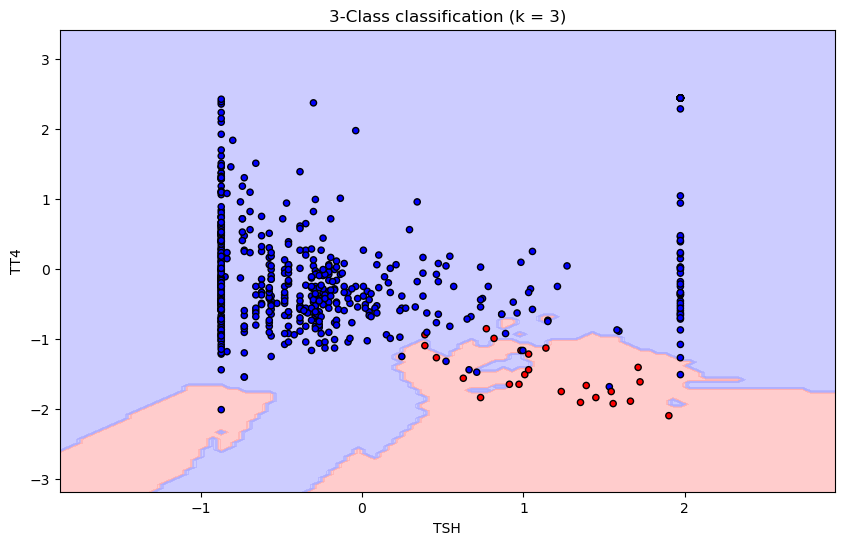

Accuracy: 0.98


In [4]:
#Libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

#Tuneable variables
numberNeighbors = 3
stepSize = 0.05
featuresToVisualize = ['TSH', 'TT4']


#Encode the features and targets if categorical
data = data.apply(LabelEncoder().fit_transform)

#Seperate into feature and target
X = data[featuresToVisualize]
Y = data['Class']

#Standarize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

#Test/Train Split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y , test_size=0.2, random_state=12) #Setting random state so that we can have same split for k=5, ease of comparison

#Setup k==3
knn = KNeighborsClassifier(n_neighbors=numberNeighbors)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)

#THIS PART WAS GENERATED USING CHATGPT, COULD NOT GET COMPANION CODE TO RUN##
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, stepSize ),
                     np.arange(y_min, y_max, stepSize ))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ['#FF0000', '#0000FF']

plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap=ListedColormap(cmap_bold), edgecolor='k', s=20)
plt.title('3-Class classification (k = 3)')
plt.xlabel(featuresToVisualize[0])
plt.ylabel(featuresToVisualize[1])
plt.show()


# Print the accuracy
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

After some attempts of trying different combinations of features, it appears that there is a decently clean decision boundary when analyzing 'TSH', 'TT4', as can be seen in the plot above and in the accuracy score. Overall most of the hypothyroid class seems to fall well within the decision boundary with a few exceptions, of the leftside hypothyroid slice encompassing a non-hypothyroid sample and a few scattered hypothryroid/non-hypothyroid points on either side of the boundary. 

## Question 2: 5-nearest neighbors (10 points)
Use k-nearest neighbor to classify the hypothyroid data again, but now set the number of neighbors to 5. Split the data so that 80% is used for training and the remaining 20% for testing. Using two features of your choice, build the model on the training set and visualize the results on the testing set by plotting the decision boundaries. Any observations about the decision boundary? How does it differ from the decision boundary when k = 3?

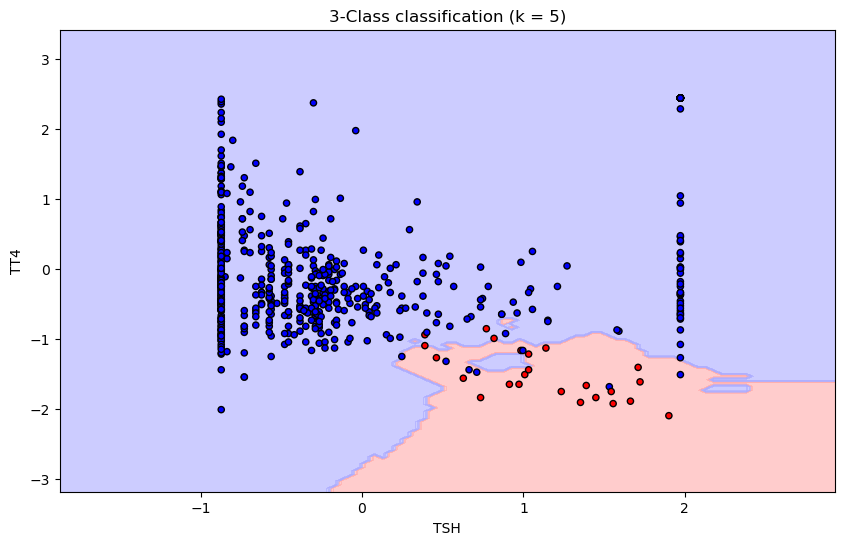

Accuracy: 0.99


In [68]:
###COPIED ABOVE CODE FOR QUESTION 1, CHANGED NEIGHBORS TO 5####

#Libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

#Tuneable variables
numberNeighbors = 5 #Changed to 5
stepSize = 0.05
featuresToVisualize = ['TSH', 'TT4']


#Encode the features and targets if categorical
data = data.apply(LabelEncoder().fit_transform)

#Seperate into feature and target
X = data[featuresToVisualize]
Y = data['Class']

#Standarize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

#Test/Train Split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y , test_size=0.2, random_state=12) #Setting random state so that we can have same split for k=3, ease of comparison

#Setup k==3
knn = KNeighborsClassifier(n_neighbors=numberNeighbors)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)

#THIS PART WAS GENERATED USING CHATGPT, COULD NOT GET COMPANION CODE TO RUN##
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, stepSize ),
                     np.arange(y_min, y_max, stepSize ))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ['#FF0000', '#0000FF']

plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap=ListedColormap(cmap_bold), edgecolor='k', s=20)
plt.title('3-Class classification (k = 5)')
plt.xlabel(featuresToVisualize[0])
plt.ylabel(featuresToVisualize[1])
plt.show()


# Print the accuracy
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Overall the desicion boundary appears to have improved significantly with the vast majority of the hypothyroid class falling well within the boundary (Less the aforementioned exceptions) The hypothyroid decision boundary appears to have improved significantly when compared with the k=3 boundary with the left hand hypothyroid decision boundary cleaned up and some of the upper hypothyroid samples are now classified correctly.

## Question 3: Decision Tree (15 points) 
Use a decision tree to classify the hypothyroid data. Split the data so that 80% is used fortraining and the remaining 20% for testing. The scikit-learn implementation of decision tree is called DecisionTreeClassifier  sklearn.tree.DecisionTreeClassifier). Using two features of your choice, build the model on the training set and visualize the results on the testing set by plotting the decision boundaries. Any observations about the decision boundary? Any observations about the decision boundary? How does it differ from the decision boundaries produced by k-Nearest Neighbor?

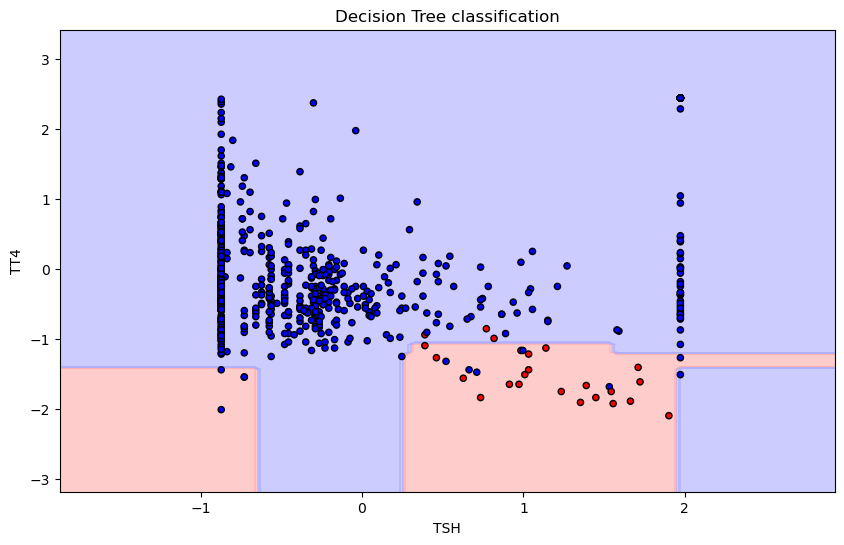

Accuracy: 0.98


In [77]:
###REFERENCED CODE FROM QUESTION 1, CHANGED MODEL TO DECISION TREE####

#Libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

#Tuneable variables
stepSize = 0.05
featuresToVisualize = ['TSH', 'TT4']


#Encode the features and targets if categorical
data = data.apply(LabelEncoder().fit_transform)

#Seperate into feature and target
X = data[featuresToVisualize]
Y = data['Class']

#Standarize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

#Test/Train Split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y , test_size=0.2, random_state=12) #Setting random state so that we can have same split for k=3, ease of comparison

#Create Decision Tree model --> Only component modified
decisionTree = DecisionTreeClassifier(max_depth=4)
decisionTree.fit(X_train, Y_train)
y_pred = decisionTree.predict(X_test)



#THIS PART WAS GENERATED USING CHATGPT, COULD NOT GET COMPANION CODE TO RUN##
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, stepSize ),
                     np.arange(y_min, y_max, stepSize ))

Z = decisionTree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ['#FF0000', '#0000FF']

plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap=ListedColormap(cmap_bold), edgecolor='k', s=20)
plt.title('Decision Tree classification')
plt.xlabel(featuresToVisualize[0])
plt.ylabel(featuresToVisualize[1])
plt.show()


# Print the accuracy
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')



Overall the deicision tree has a very defined boundary with a significant portion of the hypothyroid dataset falling within the boundary. Aditionally we can notice the left hand side having a portion of the non-hypothyroid dataset being classified as hypothyroid and a right tail extending far past the training data. Overall although they have similar levels of accuracy there boundaries are completely different.